In [102]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [103]:
raw_data = pd.read_csv("Alpha.csv", delimiter=",")
raw_data.head(5)

,Name,N,Open,Distance,Price,Rating,Freq,TimeSpent (avg),Went
0,Sheraton Brooklyn New York Hotel,1475,0,274.679826,2,4.0,0,15,0
1,Sheraton Brooklyn New York Hotel,1475,0,274.679826,2,4.0,0,15,0
2,Sophie's Cuban Cuisine,429,0,374.895556,2,4.2,0,20,0
3,Sophie's Cuban Cuisine,429,0,374.895556,2,4.2,0,20,0
4,Dallas BBQ,3222,0,429.207794,2,4.1,0,60,0


In [104]:
drop_columns = ["Name"]

X_val = raw_data[raw_data.columns[1:-1]]
Y_val = raw_data[raw_data.columns[-1]]

X_val.head(5)

,N,Open,Distance,Price,Rating,Freq,TimeSpent (avg)
0,1475,0,274.679826,2,4.0,0,15
1,1475,0,274.679826,2,4.0,0,15
2,429,0,374.895556,2,4.2,0,20
3,429,0,374.895556,2,4.2,0,20
4,3222,0,429.207794,2,4.1,0,60


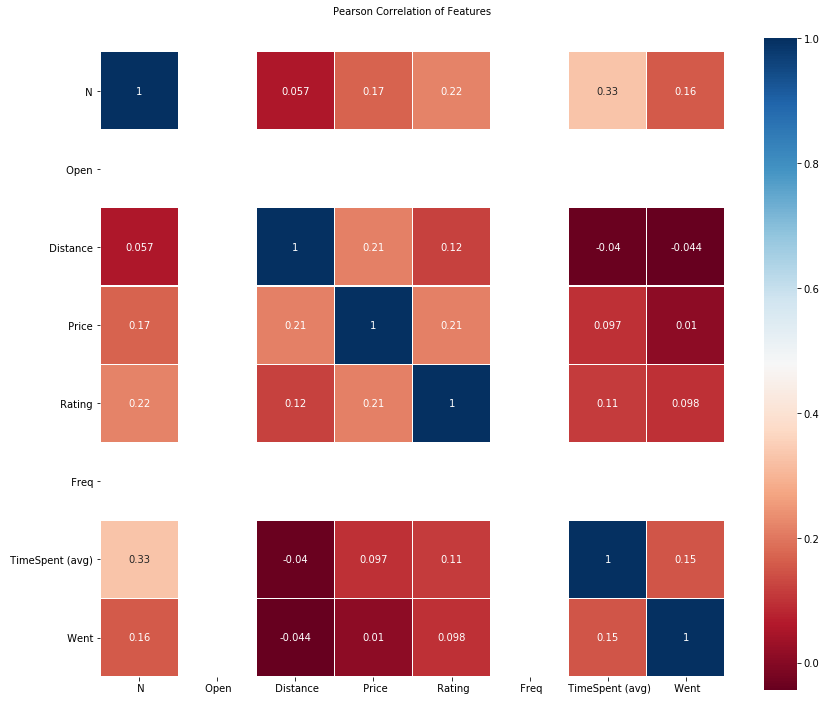

In [105]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=10)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X_val, Y_val, random_state=10)#default is 1/4 test
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
l1 = LogisticRegression(random_state=0, solver='lbfgs',max_iter= 7000,penalty='l2',multi_class = 'multinomial')
l1.fit(x_train, y_train)
l2 = LogisticRegression(random_state=0, solver='saga',max_iter= 7000,penalty='l1',multi_class = 'multinomial')
l2.fit(x_train, y_train)
l0 = LogisticRegression(random_state=0, solver='lbfgs',max_iter= 7000,multi_class = 'multinomial')
l0.fit(x_train, y_train)


((4950, 7), (1650, 7), (4950,), (1650,))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=7000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
import pickle
filename = 'Logistic.sav'
pickle.dump(l2, open('Logistic.sav2', 'wb'))
pickle.dump(l1, open('Logistic.sav1', 'wb'))
pickle.dump(l0, open('Logistic.sav0', 'wb'))

l2 Accuracy on the training data is 0.882424
l1 Accuracy on the training data is 0.882424
l0 Accuracy on the training data is 0.882424


Text(0.5,1,'l0-regularization')

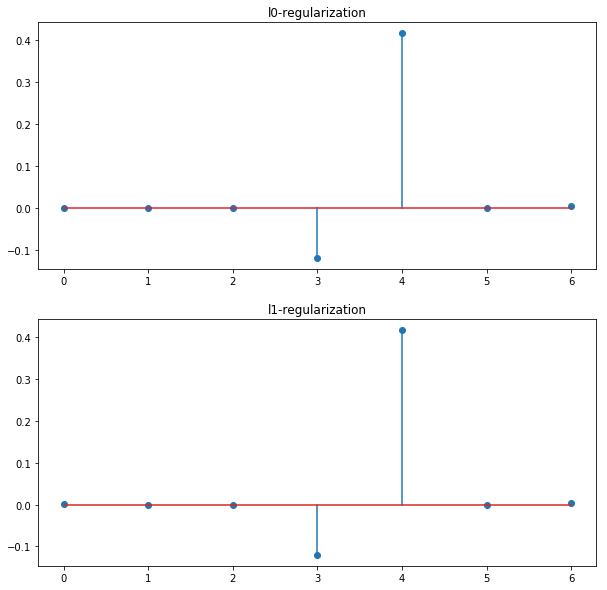

In [108]:
yhat = l2.predict(x_test)
acc = numpy.mean(yhat == y_test)
print('l2 Accuracy on the training data is {0:f}'.format(acc))
W_l2 = l2.coef_

yhat = l1.predict(x_test)
acc = numpy.mean(yhat == y_test)
print('l1 Accuracy on the training data is {0:f}'.format(acc))
W_l1 = l1.coef_

yhat = l0.predict(x_test)
acc = numpy.mean(yhat == y_test)
print('l0 Accuracy on the training data is {0:f}'.format(acc))
W_l0 = l0.coef_

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.stem(W_l2[0,:],use_line_collection=True)
plt.title('l2-regularization')
plt.subplot(2,1,2)
plt.stem(W_l1[0,:],use_line_collection=True)
plt.title('l1-regularization')
plt.subplot(2,1,1.1)
plt.stem(W_l0[0,:],use_line_collection=True)
plt.title('l0-regularization')

In [110]:
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


88.99

In [112]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


88.36

In [114]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.03

In [115]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

87.78

In [117]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

88.99

In [118]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

88.99